In [1]:
import os 
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

import sys
sys.path.extend(['../..', '.'])
from nebula.plots import plotCrossValidationFolder, plotCrossValidationFieldvsKeys, plotVocabSizeMaxLenTests, plotCrossValidationDict, plotCrossValidationTrainingTime, plotVocabSizeMaxLenArchComparison, plotVocabSizeMaxLenHeatmap
from nebula.evaluation import readCrossValidationFolder, readCrossValidationMetricFile

PLOT_OUT_FOLDER = "../plots/"
os.makedirs(PLOT_OUT_FOLDER, exist_ok=True)

# Compare the preprocessing methods

## Using lineplots with maxLen = 1024 and vocabSize = 2000

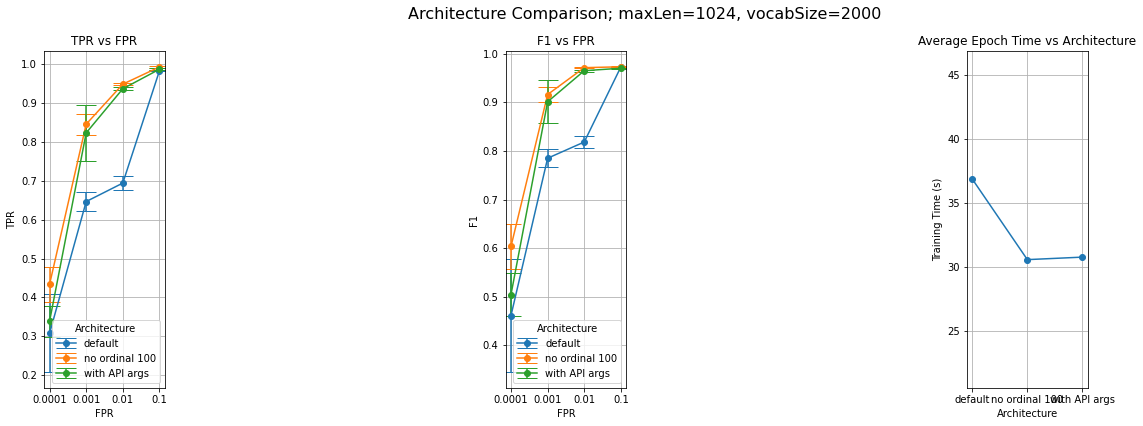

In [2]:
savePath = f"{PLOT_OUT_FOLDER}_PreProcessingComparison.png"
figSize = (18, 6)
field="Architecture"

default = r"C:\Users\dtrizna\Code\nebula\evaluation\crossValidation\Cnn1DLinear_VocabSize_maxLen"
noOrdinal100 = r"C:\Users\dtrizna\Code\nebula\evaluation\crossValidation_NoOrdinal100\Cnn1DLinear_VocabSize_maxLen"
withAPIargs = r"C:\Users\dtrizna\Code\nebula\evaluation\crossValidation_WithAPIargs\Cnn1DLinear_VocabSize_maxLen"

vmFolders = [default, noOrdinal100, withAPIargs]
labels = ["default", "no ordinal 100", "with API args"]
_, _, fig, ax = plotVocabSizeMaxLenArchComparison(vmFolders, maxLen=1024, vocabSize=2000, savePath=savePath, legendTitle=field)

# modify legend for first plot
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, title=field)
# do the saame for ax[1]
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, labels, title=field)
# set basePaths as xticklabels for ax[2]
ax[2].set_xticks(ax[2].get_xticks())
_ = ax[2].set_xticklabels(labels)

## Heatmaps

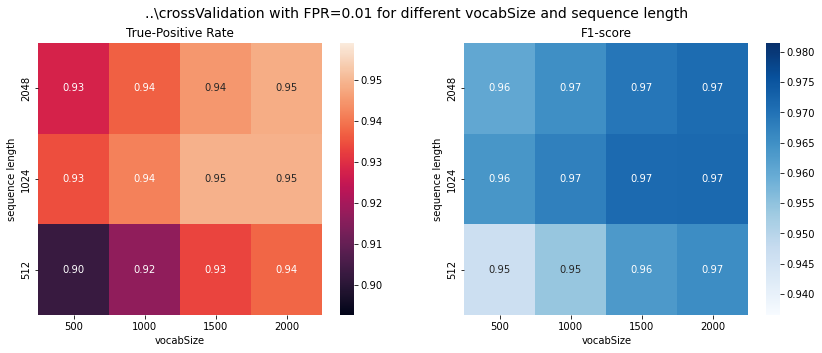

In [40]:
fpr = "0.01"

inFolder = "Cnn1DLinear_VocabSize_maxLen"
savePath = None # f"{PLOT_OUT_FOLDER}/{inFolder}_heatmap.png"
plotVocabSizeMaxLenHeatmap(inFolder, fpr, savePath=savePath, rangeL=0.01, figSize=(18, 5))

inFolder = r"..\crossValidation_NoOrdinal100\Cnn1DLinear_VocabSize_maxLen"
savePath = None # f"{PLOT_OUT_FOLDER}/{inFolder}_heatmap.png"
fpr = "0.01"
plotVocabSizeMaxLenHeatmap(inFolder, fpr, savePath=savePath, rangeL=0.01, figSize=(14, 5))

inFolder = r"..\crossValidation\Cnn1DLinear_VocabSize_maxLen"
savePath = None # f"{PLOT_OUT_FOLDER}/{inFolder}_heatmap.png"
fpr = "0.01"
plotVocabSizeMaxLenHeatmap(inFolder, fpr, savePath=savePath, rangeL=0.01, figSize=(14, 5))

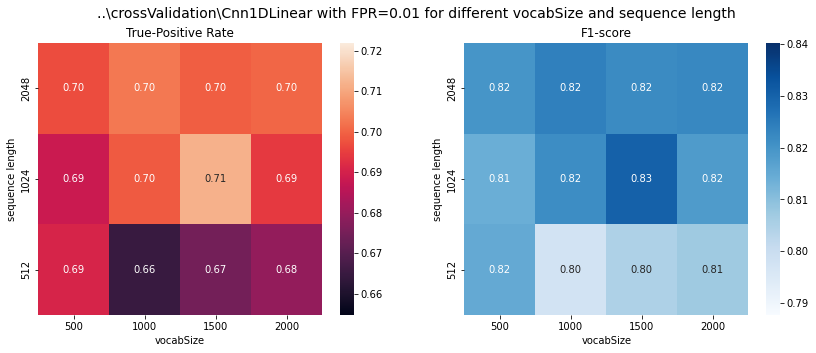